In [82]:
import yaml
import sys
import os
import numpy as np
import torch 
os.chdir('/home/jonfrey/PLR3')
sys.path.insert(0, os.getcwd())
sys.path.append(os.path.join(os.getcwd() + '/src'))
sys.path.append(os.path.join(os.getcwd() + '/lib'))

import loaders_v2
from loaders_v2 import GenericDataset
from rotations import * 

exp_cfg_path = '/home/jonfrey/PLR3/yaml/exp/exp_ws_deepim_debug_natrix.yml'
env_cfg_path = '/home/jonfrey/PLR3/yaml/env/env_natrix_jonas.yml'

def load_from_file(p):
    if os.path.isfile(p):
        with open(p, 'r') as f:
            data = yaml.safe_load(f)
    else:
        raise ValueError
    return data

exp = load_from_file(exp_cfg_path)
env = load_from_file(env_cfg_path)

dataset_train = GenericDataset(
    cfg_d=exp['d_train'],
    cfg_env=env)

batch = dataset_train[13450][0] #bann 10450
points, choose, img, target, model_points, idx = batch[0:6]
depth_img, label_img, img_orig, cam = batch[6:10]
gt_rot_wxyz, gt_trans, unique_desig = batch[10:13]

real_img, render_img, real_d, render_d, gt_label_cropped = batch[13:18]
pred_rot_wxyz, pred_trans, pred_points, h_render,h_real, render_img_original = batch[18:24]
u_map, v_map, flow_mask,  bb = batch[24:]

import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

class Drawer():
    def __init__(self):
        self.im_in_plot = 0
        self.data = []
        
    def disp_img_1d(self,img,hold=False, save=False, nr=0):
        self.data.append(img)
        p = '/home/jonfrey/Debug/Midterm2/'
        
        if not hold:
            fig = plt.figure(figsize=(6*2*len(self.data),7))
            ax = []
            for j,a in enumerate(self.data):
                ax.append( fig.add_subplot(1,len(self.data), j+1)  )
                
                ax[-1].get_xaxis().set_visible(False)
                ax[-1].get_yaxis().set_visible(False)
                pos = ax[-1].imshow( a, cmap='Reds' )
                fig.colorbar(pos, ax=ax[-1])
            plt.show()
            if save:
                fig.savefig(p+str(nr)+'.png', dpi=300)
                
            self.data = []
            self.ax = []
    



h = 480
w = 640

from visu import plot_pcd, Visualizer
import copy
from scipy.spatial.transform import Rotation as R
from helper import re_quat
from PIL import Image, ImageDraw


Finished loading meshes 0.04635286331176758


In [96]:
desig = unique_desig[0]
_p_ycb = "/media/scratch1/jonfrey/datasets/YCB_Video_Dataset"
depth = np.array(Image.open(
    '{0}/{1}-depth.png'.format(_p_ycb, desig)))
depth.shape

label = np.array(Image.open(
    '{0}/{1}-label.png'.format(_p_ycb, desig)))

torch.Size([480, 640, 3])
tensor(0.)


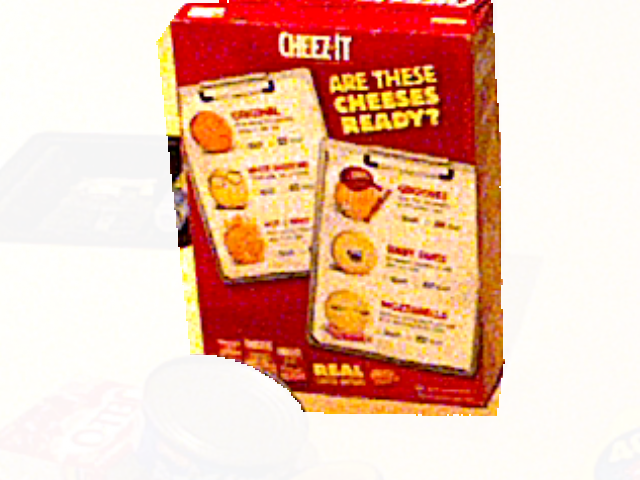

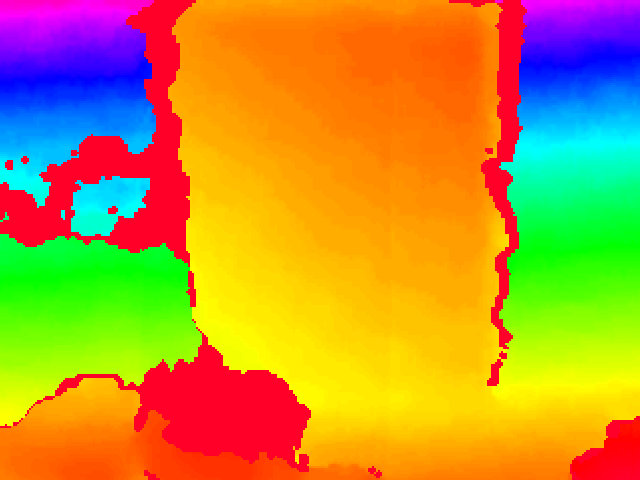

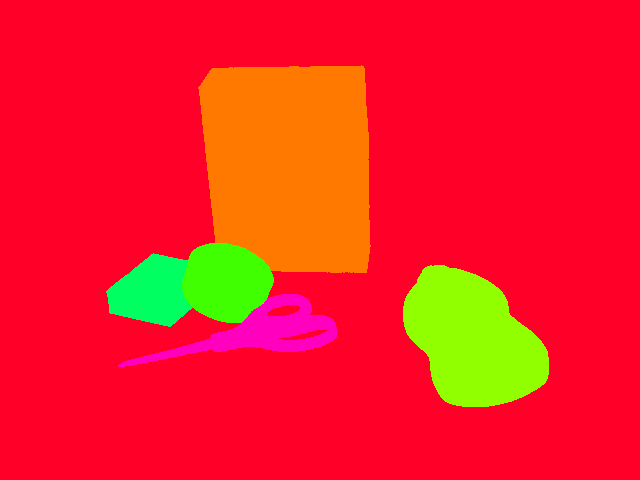

In [104]:
Nc = 256
cmap = plt.cm.get_cmap('gist_rainbow', Nc)
cmaplist = [cmap(i) for i in range(cmap.N)]

def disp_alignment(depth, label, real):
    data = np.zeros((480,640,4), dtype=np.uint8)
    data_depth = np.zeros((480,640,4), dtype=np.uint8)
    t = real.permute(1,2,0)
    print(t.shape)
    data[:,:,:3] = t.numpy() # red patch in upper left
    data_depth[:,:,:3] = t.numpy()
    data[:,:,3] = 10
    
#     idx = np.uint8(label==2) *255
    data[:,:,3][label==2] = 255
    
    min_val = torch.min( depth[depth!=0] )
    max_val = torch.max( depth[depth!=0] )
    val = torch.clamp( (depth-min_val) / (max_val-min_val)*255 ,0,255)
    print( torch.min( val ) )

     


    img = Image.fromarray(data, 'RGBA')
    display(img)
    data_depth = np.zeros((480,640,4), dtype=np.uint8)
    data_depth[:,:,3] = 255
#     print(val.shape)
    for i in range(480):
        for j in range(640):
#             print(int( val[i,j]),  cmaplist[ int(val[i,j])])
            data_depth[i,j,:4] = np.array( cmaplist[ int(val[i,j])] )*255
    data_depth[:,:,3] = 255
    data_depth[:,:,3][label==2] = 255
    img_depth = Image.fromarray(data_depth, 'RGBA')
    display(img_depth)

disp_alignment(real_d[0], gt_label_cropped, real_img)
#disp_alignment(torch.tensor(depth, dtype=torch.float32), gt_label_cropped, real_img)
def plot(mask):
    min_val = torch.min( mask )
    max_val = float( max(1,torch.max( mask )) )
    mask = torch.clamp( (mask-min_val) / (max_val-min_val)*255 ,0,255)
    
    data_depth = np.zeros((480,640,4), dtype=np.uint8)
    data_depth[:,:,3] = 255
#     print(val.shape)
    for i in range(480):
        for j in range(640):
#             print(int( val[i,j]),  cmaplist[ int(val[i,j])])
            data_depth[i,j,:4] = np.array( cmaplist[ int(mask[i,j])] )*255
    data_depth[:,:,3] = 255
    data_depth[:,:,3][label==2] = 255
    img_depth = Image.fromarray(data_depth, 'RGBA')
    display(img_depth)
plot(torch.tensor(label))
# disp_alignment(torch.tensor(label, dtype=torch.float32), gt_label_cropped, real_img)

In [98]:
real_d[0]
print(torch.max(real_d[0]))
print(torch.min(real_d[0]))

tensor(17890.)
tensor(0.)
